Support Vector Machine (SVM) 

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression, but it is most powerful for classification.

Its main idea is to find the best boundary (hyperplane) that separates data points of different classes.

1. Core Intuition

Imagine two classes of points on a 2D plane.

👉 There are many possible lines that separate them

👉 SVM chooses the line that maximizes the margin

Margin

Distance between the closest points of each class and the decision boundary

Larger margin → better generalization

2. Key Terms
1️⃣ Hyperplane

Decision boundary

In 2D → line

In 3D → plane

In higher dimensions → hyperplane

Equation:

𝑤
⋅
𝑥
+
𝑏
=
0
w⋅x+b=0
2️⃣ Support Vectors

Data points closest to the hyperplane

These points define the boundary

Removing other points doesn’t change the boundary

In [3]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
# load the dataset
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data      # shape: (1797, 64)
y = digits.target    # labels 0–9

print(X.shape)
print(y.shape)


(1797, 64)
(1797,)


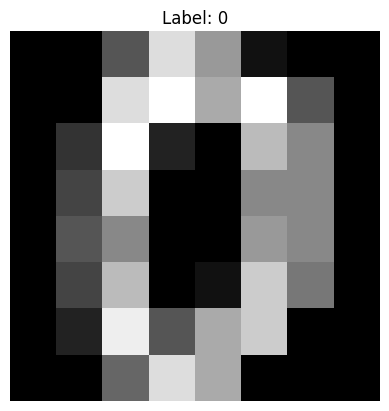

In [5]:
# visualize some digits
import matplotlib.pyplot as plt

plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.axis('off')
plt.show()


In [6]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Train SVM Model
### Using RBF Kernel (Best Choice)

In [16]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    C=100,
    gamma=0.01
)

svm.fit(X_train, y_train)


,C,100
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9805555555555555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



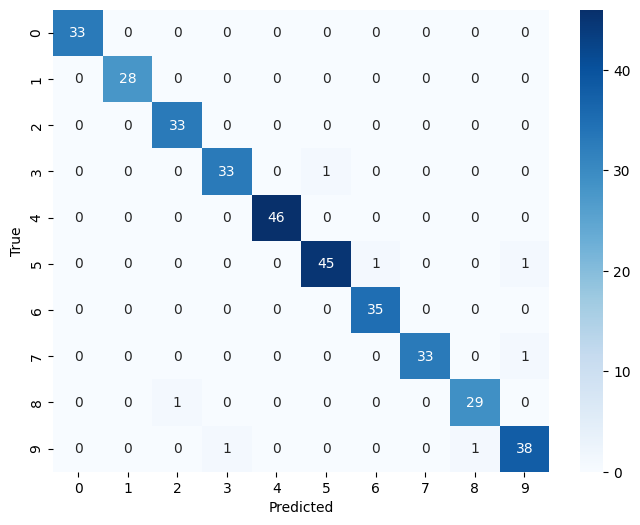

In [19]:
## confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.001, 'scale'],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
